In [1]:
%pip install transformers==4.44.0 huggingface_hub==0.24.5 nltk==3.8.1



   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.5 MB 4.8 MB/s eta 0:00:02
   --------- ------------------------------ 2.4/9.5 MB 7.1 MB/s eta 0:00:02
   ---------------- ----------------------- 3.9/9.5 MB 7.6 MB/s eta 0:00:01
   ----------------------- ---------------- 5.5/9.5 MB 7.5 MB/s eta 0:00:01
   ------------------------------- -------- 7.3/9.5 MB 7.7 MB/s eta 0:00:01
   ------------------------------------- -- 8.9/9.5 MB 7.5 MB/s eta 0:00:01
   ---------------------------------------- 9.5/9.5 MB 7.4 MB/s  0:00:01
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 8.0 MB/s  0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------- ----------- 1.6/2.2 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 8.4 MB/s  0:00:00

   --------------------------------------

In [29]:
from transformers import pipeline
from nltk import sent_tokenize
import nltk
import torch
from glob import glob
import pandas as pd
import numpy as np

MODEL


In [7]:
model_name= "facebook/bart-large-mnli"
device= "cuda" if torch.cuda.is_available() else 'cpu'



In [8]:
def load_model(device):
    classifier = pipeline("zero-shot-classification", model=model_name, device=device)
    return classifier

In [10]:
%pip install transformers torch --quiet


Note: you may need to restart the kernel to use updated packages.


In [ ]:
theme_classifier = load_model(device)

In [13]:
import os
cache_dir = os.path.expanduser("~/.cache/huggingface/hub")
print("Cached models:")
for item in os.listdir(cache_dir):
    if "bart" in item.lower():
        print(f"  {item}")

Cached models:
  models--facebook--bart-large-mnli


In [14]:
from transformers import pipeline
import time

print("Loading from cache...")
start_time = time.time()

classifier = pipeline(
    "zero-shot-classification",
    model="facebook/bart-large-mnli",
    local_files_only=True,  # Force use of cached files only
    device=-1  # CPU
)

print(f"Loaded in {time.time()-start_time:.1f} seconds")
print("Model loaded successfully!")

Loading from cache...
Loaded in 67.9 seconds
Model loaded successfully!


In [15]:
# Keep the model loaded in memory for multiple uses
def load_model_once():
    global theme_classifier
    if 'theme_classifier' not in globals():
        print("Loading model...")
        theme_classifier = pipeline(
            "zero-shot-classification",
            model="facebook/bart-large-mnli",
            local_files_only=True,
            device=-1
        )
        print("Model loaded and cached in memory")
    return theme_classifier

# Use it like this:
classifier = load_model_once()  # First call: ~68s
classifier = load_model_once()  # Subsequent calls: instant

Loading model...
Model loaded and cached in memory


In [17]:
theme_list=["friendship", "betrayal", "hope","sacrifice","battle","self_development","betrayal","love","dialogue"
]

In [20]:
# Your model is loaded, just assign it
theme_classifier = classifier

# Now you can use it exactly as you wanted:
result = theme_classifier(
    "I gave him a right hook then a left jab",
    theme_list,
    multi_label=True
)

print(result)

{'sequence': 'I gave him a right hook then a left jab', 'labels': ['battle', 'self_development', 'hope', 'sacrifice', 'dialogue', 'betrayal', 'betrayal', 'love', 'friendship'], 'scores': [0.9121252298355103, 0.4284914433956146, 0.08781788498163223, 0.04500041902065277, 0.02013299986720085, 0.012040478177368641, 0.012040478177368641, 0.004292412661015987, 0.002817223547026515]}


Load Dataset


In [21]:
files =glob('../data/Subtitles/*.ass')

In [22]:
files[:5]

['../data/Subtitles\\Naruto Season 1 - 01.ass',
 '../data/Subtitles\\Naruto Season 1 - 02.ass',
 '../data/Subtitles\\Naruto Season 1 - 03.ass',
 '../data/Subtitles\\Naruto Season 1 - 04.ass',
 '../data/Subtitles\\Naruto Season 1 - 05.ass']

In [ ]:
with open(files[0],'r') as file:
    lines = file.readlines()
    lines = lines[27:]
    lines =  [ ",".join(line.split(',')[9:])  for line in lines ]

In [24]:
lines[:2]

['A long time ago, a powerful demon fox\\Nappeared with nine tails.\n',
 'With its powerful tails,\n']

In [25]:
lines = [ line.replace('\\N',' ') for line in lines]

In [26]:
lines[:2]

['A long time ago, a powerful demon fox appeared with nine tails.\n',
 'With its powerful tails,\n']

In [27]:
" ".join(lines[:10])

"A long time ago, a powerful demon fox appeared with nine tails.\n With its powerful tails,\n it could smash mountains and create tidal waves.\n A band of Ninjas rose to defend their village from attack.\n We have to wait until the Fourth Hokage gets here!\n We can't let it get any closer to our village!\n One great Ninja was able to imprison the monster,\n but died in the process.\n This Ninja was known asâ€¦ the Fourth Hokage.\n Naruto!\n"

In [28]:
int(files[0].split('-')[-1].split('.')[0].strip())

1

In [34]:
def load_subtitles_dataset(dataset_path):
    subtitles_paths = glob(dataset_path+'/*.ass')

    scripts=[]
    episode_num=[]

    for path in subtitles_paths:

        #Read Lines
       with open(path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        lines = lines[27:]
        lines = [",".join(line.split(',')[9:]) for line in lines]

        
        lines = [ line.replace('\\N',' ') for line in lines]
        script = " ".join(lines)

        episode = int(path.split('-')[-1].split('.')[0].strip())

        scripts.append(script)
        episode_num.append(episode)

    df = pd.DataFrame.from_dict({"episode":episode_num, "script":scripts })
    return df

In [35]:
dataset_path = "../data/Subtitles"
df = load_subtitles_dataset(dataset_path)

In [36]:
df.head()

,episode,script
0,1,"A long time ago, a powerful demon fox appeared..."
1,2,"C'mon!\n Running like a fugitive,\n Being chas..."
2,3,"C'mon!\n Running like a fugitive,\n Being chas..."
3,4,"C'mon!\n Running like a fugitive,\n Being chas..."
4,5,"C'mon!\n Running like a fugitive,\n Being chas..."


RUN MODEL

In [37]:
script = df.iloc[0]['script']

In [38]:
script

'A long time ago, a powerful demon fox appeared with nine tails.\n With its powerful tails,\n it could smash mountains and create tidal waves.\n A band of Ninjas rose to defend their village from attack.\n We have to wait until the Fourth Hokage gets here!\n We can\'t let it get any closer to our village!\n One great Ninja was able to imprison the monster,\n but died in the process.\n This Ninja was known as… the Fourth Hokage.\n Naruto!\n Why did you do such a thing?!\n You\'re really gonna get it this time!\n I don\'t care!\n You know your problem?\n You can\'t do the things I do!\n Only I can do this!\n I\'m better than all of you! Believe it!\n There\'s a problem, sir!\n Lord Hokage!\n What is it?\n Did that Naruto do something again?\n Yes. He climbed onto the Mountainside Images…\n And he vandalized and graffitied all over them!\n Wait!\n Ha ha…\n Why should I?\n Hey, Naruto!\n How did you suddenly get here, lruka Sensei?\n The question is what are you doing here when you should 

In [39]:
script_sentences = sent_tokenize(script)
script_sentences[:3]

['A long time ago, a powerful demon fox appeared with nine tails.',
 'With its powerful tails,\n it could smash mountains and create tidal waves.',
 'A band of Ninjas rose to defend their village from attack.']

In [40]:
# Batch Sentence
sentence_batch_size=20
script_batches = []
for index in range(0,len(script_sentences),sentence_batch_size):
    sent = " ".join(script_sentences[index:index+sentence_batch_size])
    script_batches.append(sent)

In [41]:
script_batches[:2]

["A long time ago, a powerful demon fox appeared with nine tails. With its powerful tails,\n it could smash mountains and create tidal waves. A band of Ninjas rose to defend their village from attack. We have to wait until the Fourth Hokage gets here! We can't let it get any closer to our village! One great Ninja was able to imprison the monster,\n but died in the process. This Ninja was known as… the Fourth Hokage. Naruto! Why did you do such a thing?! You're really gonna get it this time! I don't care! You know your problem? You can't do the things I do! Only I can do this! I'm better than all of you! Believe it! There's a problem, sir! Lord Hokage! What is it? Did that Naruto do something again?",
 'Yes. He climbed onto the Mountainside Images…\n And he vandalized and graffitied all over them! Wait! Ha ha…\n Why should I? Hey, Naruto! How did you suddenly get here, lruka Sensei? The question is what are you doing here when you should be in class now? Now listen, Naruto. You failed t

In [42]:
theme_output = theme_classifier(
    script_batches[:2],
    theme_list,
    multi_label=True
)

In [43]:
theme_output

[{'sequence': "A long time ago, a powerful demon fox appeared with nine tails. With its powerful tails,\n it could smash mountains and create tidal waves. A band of Ninjas rose to defend their village from attack. We have to wait until the Fourth Hokage gets here! We can't let it get any closer to our village! One great Ninja was able to imprison the monster,\n but died in the process. This Ninja was known as… the Fourth Hokage. Naruto! Why did you do such a thing?! You're really gonna get it this time! I don't care! You know your problem? You can't do the things I do! Only I can do this! I'm better than all of you! Believe it! There's a problem, sir! Lord Hokage! What is it? Did that Naruto do something again?",
  'labels': ['dialogue',
   'betrayal',
   'betrayal',
   'battle',
   'sacrifice',
   'self_development',
   'hope',
   'friendship',
   'love'],
  'scores': [0.9800742268562317,
   0.9396902322769165,
   0.9396902322769165,
   0.8546884655952454,
   0.7349812388420105,
   0.

In [44]:
# Wrangle Ouput
# battle: [0.51489498, 0.2156498]
themes = {}
for output in theme_output:
    for label,score in zip(output['labels'],output['scores']):
        if label not in themes:
            themes[label] = []
        themes[label].append(score)

In [45]:
themes = {key: np.mean(np.array(value)) for key,value in themes.items()}
themes

{'dialogue': np.float64(0.9585434198379517),
 'betrayal': np.float64(0.7927078604698181),
 'battle': np.float64(0.756410151720047),
 'sacrifice': np.float64(0.6804326474666595),
 'self_development': np.float64(0.6187310814857483),
 'hope': np.float64(0.20166907459497452),
 'friendship': np.float64(0.0726284310221672),
 'love': np.float64(0.034141264855861664)}

In [46]:
def get_themes_inference(script):
    script_sentences = sent_tokenize(script)

    # Batch Sentence
    sentence_batch_size=20
    script_batches = []
    for index in range(0,len(script_sentences),sentence_batch_size):
        sent = " ".join(script_sentences[index:index+sentence_batch_size])
        script_batches.append(sent)
    
    # Run Model
    theme_output = theme_classifier(
        script_batches[:2],
        theme_list,
        multi_label=True
    )

    # Wrangle Output 
    themes = {}
    for output in theme_output:
        for label,score in zip(output['labels'],output['scores']):
            if label not in themes:
                themes[label] = []
            themes[label].append(score)

    themes = {key: np.mean(np.array(value)) for key,value in themes.items()}

    return themes

In [47]:
df = df.head(2)


In [48]:
df

,episode,script
0,1,"A long time ago, a powerful demon fox appeared..."
1,2,"C'mon!\n Running like a fugitive,\n Being chas..."


In [49]:
output_themes = df['script'].apply(get_themes_inference)

In [50]:
output_themes

0    {'dialogue': 0.9585434198379517, 'betrayal': 0...
1    {'dialogue': 0.9606060981750488, 'sacrifice': ...
Name: script, dtype: object

In [51]:
theme_df = pd.DataFrame(output_themes.tolist())

In [52]:
theme_df

,dialogue,betrayal,battle,sacrifice,self_development,hope,friendship,love
0,0.958543,0.792708,0.756410,0.680433,0.618731,0.201669,0.072628,0.034141
1,0.960606,0.429944,0.684846,0.570703,0.333987,0.154533,0.046261,0.173261


In [53]:
df[theme_df.columns] = theme_df
df

,episode,script,dialogue,betrayal,battle,sacrifice,self_development,hope,friendship,love
0,1,"A long time ago, a powerful demon fox appeared...",0.958543,0.792708,0.756410,0.680433,0.618731,0.201669,0.072628,0.034141
1,2,"C'mon!\n Running like a fugitive,\n Being chas...",0.960606,0.429944,0.684846,0.570703,0.333987,0.154533,0.046261,0.173261


Visualize Output


In [54]:
df = df.drop('dialogue',axis=1)
theme_output = df.drop(['episode','script'],axis=1).sum().reset_index()
theme_output.columns = ['theme','score']
theme_output

,theme,score
0,betrayal,1.222652
1,battle,1.441256
2,sacrifice,1.251136
3,self_development,0.952718
4,hope,0.356203
5,friendship,0.118889
6,love,0.207402


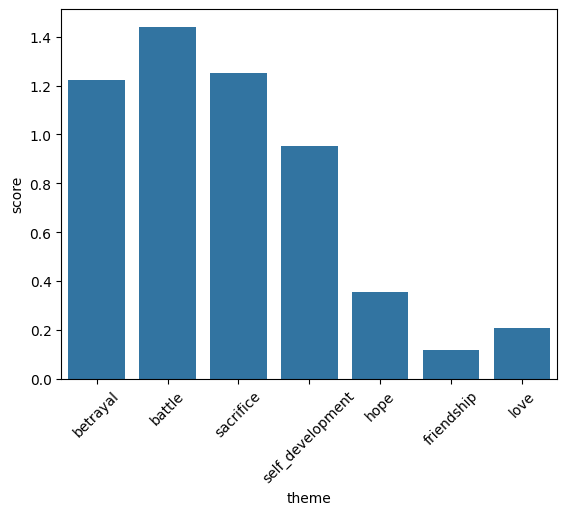

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(data = theme_output ,x="theme",y="score" )
plt.xticks(rotation=45)
plt.show()